# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
customers = pd.read_csv('Wholesale customers data.csv') # loading the data:

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:

customers.head(7)  #data sneak peak

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


In [4]:
#checking data types

'''
Any missing data to remove?
Answer: no
'''

customers.info() #data quality assessment in a nutshell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
customers.describe() #descriptive stats

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#for EDA purposes computed a total consumption column . . . 
customers['Total consumption']=customers['Fresh']+customers['Milk']+customers['Grocery']+customers['Frozen']+customers['Detergents_Paper']+customers['Delicassen']

In [7]:
#viewing how data is distributed through channels and regions...

customers.groupby(
    by=['Channel','Region'],
    axis=0,
).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  Total consumption  
Channel Region                                 
1       1            70632            1538342  
        2            30965             719150  
        3           320358            5742077  
2       1            33695             848471  
        2            23541             835938  
        3           191752            4935522

(array([ 3.,  6.,  2., 10., 21., 26., 13., 20., 35., 14., 20., 18., 23.,
        25., 18., 19., 20., 20., 12.,  4.,  5.,  8.,  9., 17.,  9.,  5.,
         6.,  4.,  5.,  1.,  3.,  3.,  6.,  3.,  3.,  2.,  2.,  0.,  1.,
         1.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([   904.  ,   2893.87,   4883.74,   6873.61,   8863.48,  10853.35,
         12843.22,  14833.09,  16822.96,  18812.83,  20802.7 ,  22792.57,
         24782.44,  26772.31,  28762.18,  30752.05,  32741.92,  34731.79,
         36721.66,  38711.53,  40701.4 ,  42691.27,  44681.14,  46671.01,
         48660.88,  50650.75,  52640.62,  54630.49,  56620.36,  58610.23,
         60600.1 ,  62589.97,  64579.84,  66569.71,  68559.58,  

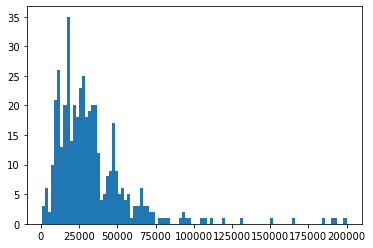

In [8]:
plt.hist(
    x=customers['Total consumption'],
    bins=100,
    #range=None,
    #density=False,
    #weights=None,
    #cmin=None,
    #cmax=None,
    #*,
    #data=None,
    #**kwargs,
)

<AxesSubplot:>

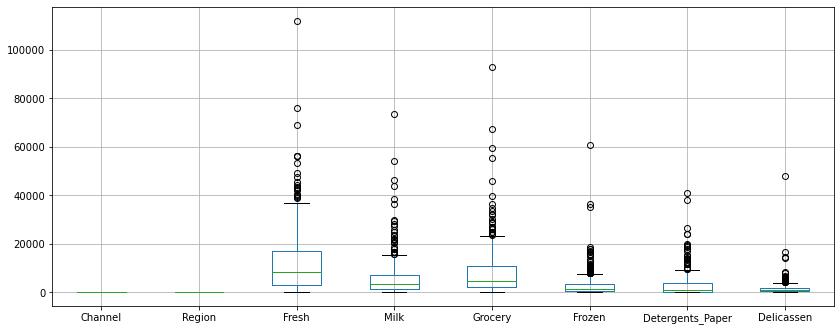

In [9]:
customers.drop(labels=['Total consumption'], axis=1, inplace=True)

'''
Descriptive statistics - any outliers to remove?
Answer: as we can see below, there are a few outliers.
'''

plt.subplots(figsize=(14, 5.5)) #resizing the boxplot...

customers.boxplot() #computing boxplot

#As it can be seen in the boxplots below, it'd be wise to standardize the information.

In [10]:
#mask  
mask=np.triu(np.ones_like(customers.corr(), dtype=np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

<AxesSubplot:>

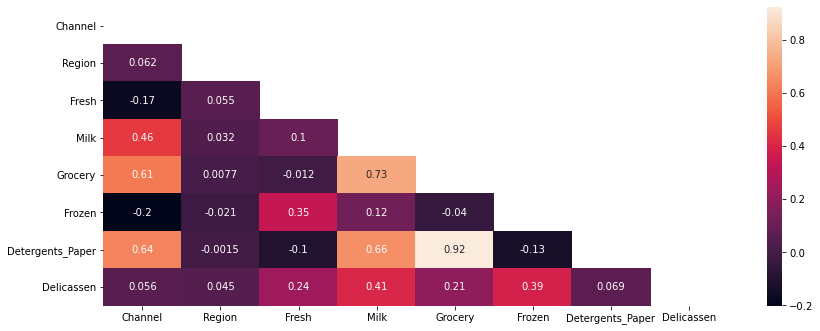

In [11]:
plt.subplots(figsize=(14, 5.5)) #resizing the boxplot...

sns.heatmap(data=customers.corr(),
            annot=True,
            xticklabels='auto',
            yticklabels='auto',
            mask=mask)

In [12]:
# Your observations here

'''
Below is the 𝘼𝙩𝙩𝙧𝙞𝙗𝙪𝙩𝙚 𝙄𝙣𝙛𝙤𝙧𝙢𝙖𝙩𝙞𝙤𝙣 and to the right my 𝙚𝙫𝙖𝙡𝙪𝙖𝙩𝙞𝙤𝙣 of the variable.

𝘼𝙩𝙩𝙧𝙞𝙗𝙪𝙩𝙚 𝙄𝙣𝙛𝙤𝙧𝙢𝙖𝙩𝙞𝙤𝙣 (information taken from the source) 
1) FRESH: annual spending (m.u.) on fresh products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable
2) MILK: annual spending (m.u.) on milk products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable
3) GROCERY: annual spending (m.u.)on grocery products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable
4) FROZEN: annual spending (m.u.)on frozen products (Continuous) 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) - 𝘾𝙖𝙩𝙚𝙜𝙤𝙧𝙞𝙘𝙖𝙡 variable
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)' - 𝘾𝙖𝙩𝙚𝙜𝙤𝙧𝙞𝙘𝙖𝙡 variable

𝙘𝙤𝙧𝙧𝙚𝙡𝙖𝙩𝙞𝙤𝙣 𝙖𝙨𝙨𝙚𝙨𝙨𝙢𝙚𝙣𝙩:
-Milk & Grocery: 0.73 highly correlated
-Milk & Detergents_paper: 0.66 highly correlated

𝙙𝙖𝙩𝙖 𝙙𝙞𝙨𝙩𝙧𝙞𝙗𝙪𝙩𝙞𝙤𝙣 𝙖𝙨𝙨𝙚𝙨𝙨𝙢𝙚𝙣𝙩:
-as we can see in the boxplot, the consumption range varies significantly throughout the numerical variables: as such,
one should do 𝙛𝙚𝙖𝙩𝙪𝙧𝙚 𝙨𝙘𝙖𝙡𝙞𝙣𝙜 (𝙨𝙩𝙖𝙣𝙙𝙖𝙧𝙙𝙞𝙯𝙖𝙩𝙞𝙤𝙣 of variables in this case)
-no binning required (?)

𝙙𝙖𝙩𝙖 𝙦𝙪𝙖𝙡𝙞𝙩𝙮 𝙖𝙨𝙨𝙚𝙨𝙨𝙢𝙚𝙣𝙩
-no null values

𝙨𝙠𝙚𝙬𝙣𝙚𝙨𝙨
data is positively skewed (more values below median)

'''

"\nBelow is the 𝘼𝙩𝙩𝙧𝙞𝙗𝙪𝙩𝙚 𝙄𝙣𝙛𝙤𝙧𝙢𝙖𝙩𝙞𝙤𝙣 and to the right my 𝙚𝙫𝙖𝙡𝙪𝙖𝙩𝙞𝙤𝙣 of the variable.\n\n𝘼𝙩𝙩𝙧𝙞𝙗𝙪𝙩𝙚 𝙄𝙣𝙛𝙤𝙧𝙢𝙖𝙩𝙞𝙤𝙣 (information taken from the source) \n1) FRESH: annual spending (m.u.) on fresh products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable\n2) MILK: annual spending (m.u.) on milk products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous) 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 𝙉𝙪𝙢𝙚𝙧𝙞𝙘𝙖𝙡 variable\n7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) - 𝘾𝙖𝙩𝙚𝙜𝙤𝙧𝙞𝙘𝙖𝙡 variable\n8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)' - 𝘾𝙖𝙩𝙚𝙜𝙤𝙧𝙞𝙘𝙖𝙡 variable\n\n𝙘𝙤𝙧𝙧𝙚𝙡𝙖𝙩𝙞𝙤𝙣 𝙖𝙨𝙨𝙚𝙨𝙨𝙢𝙚𝙣𝙩:\n-Milk & Grocery: 0.73 highly correlated\n-Milk & Detergent

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
customers.skew().skew() #checking skewness of the variables

0.9350747104910303

In [14]:
# Your code here

'''
Dropping unnecessary columns
In this case, Detergents_paper seems like the best option due to the high collinearity w Milk
'''
customers.drop('Detergents_Paper', inplace=True, axis=1)

In [15]:
'''
Removing outliers since there are tons of them, as we saw in the boxplots.
'''

lower_boundary=0.02 #defining lower boundary for the quantile
upper_boundary=0.98 #defining upper boundary for the quantile

columns_w_outliers=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']

for column in columns_w_outliers:
    max_threshold=customers[column].quantile(upper_boundary)  #checking for values above a certain threshold
    min_threshold=customers[column].quantile(lower_boundary)
    
    condition_to_remove=customers[customers[column]>max_threshold]
    
    customers.drop(condition_to_remove.index, inplace=True)

-2.1986558167065464


<AxesSubplot:>

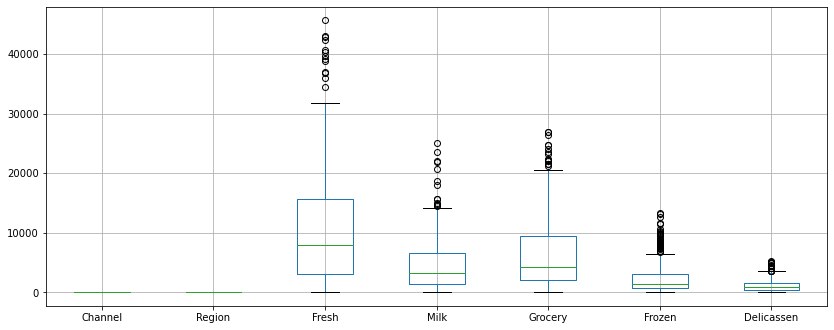

In [16]:
print(customers.skew().skew()) #checking skewness of the variables

plt.subplots(figsize=(14, 5.5)) #resizing the boxplot...

customers.boxplot() #computing boxplot

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [17]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler=StandardScaler()

scaler.fit(customers)

scaled_customers=scaler.transform(customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [18]:
# Your code here:

from sklearn.cluster import KMeans

model_kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)  #theoretically according to the rule of thumb it should actually be 15...

model_kmeans.fit(scaled_customers)

customers['labels']=model_kmeans.labels_

Count the values in `labels`.

In [19]:
# Your code here:

customers.labels.value_counts()

0    140
4     90
2     73
3     51
1     41
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [20]:
# Your code here

from sklearn.cluster import DBSCAN

model_DBSCAN=DBSCAN(eps=0.5)

model_DBSCAN.fit(scaled_customers)

customers['labels_DBSCAN']=model_DBSCAN.labels_

Count the values in `labels_DBSCAN`.

In [21]:
# Your code here:

#checking labels of clusters
customers.labels_DBSCAN.value_counts()

-1    328
 0     67
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Milk` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'K-Means')

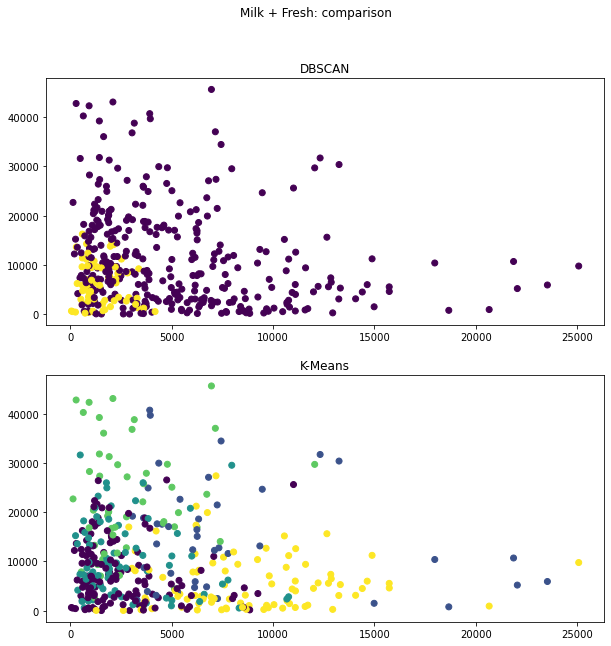

In [22]:
# Your code here:
fig, axs = plt.subplots(2, figsize=(10,10))

fig.suptitle('Milk + Fresh: comparison')
axs[0].scatter(customers['Milk'], customers['Fresh'], c=customers['labels_DBSCAN'])
axs[1].scatter(customers['Milk'], customers['Fresh'], c=customers['labels'])
axs[0].set_title('DBSCAN')
axs[1].set_title('K-Means')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'K-Means')

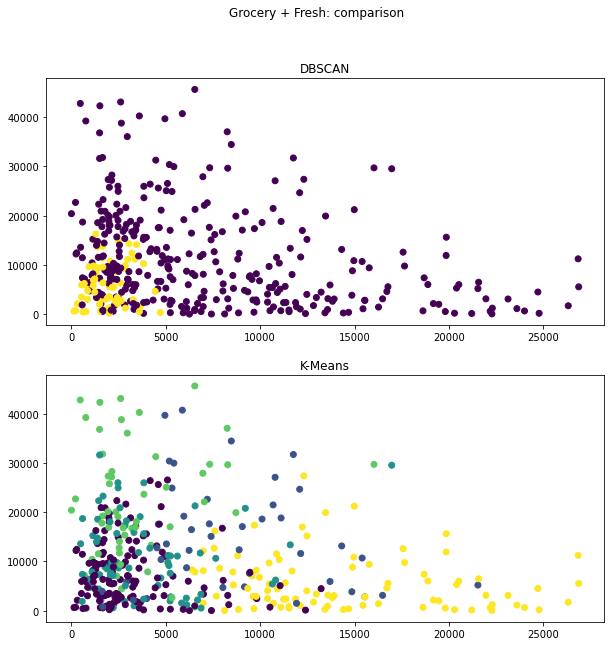

In [23]:
# Your code here:
fig, axs = plt.subplots(2, figsize=(10,10))

fig.suptitle('Grocery + Fresh: comparison')
axs[0].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'])
axs[1].scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'])
axs[0].set_title('DBSCAN')
axs[1].set_title('K-Means')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'K-Means')

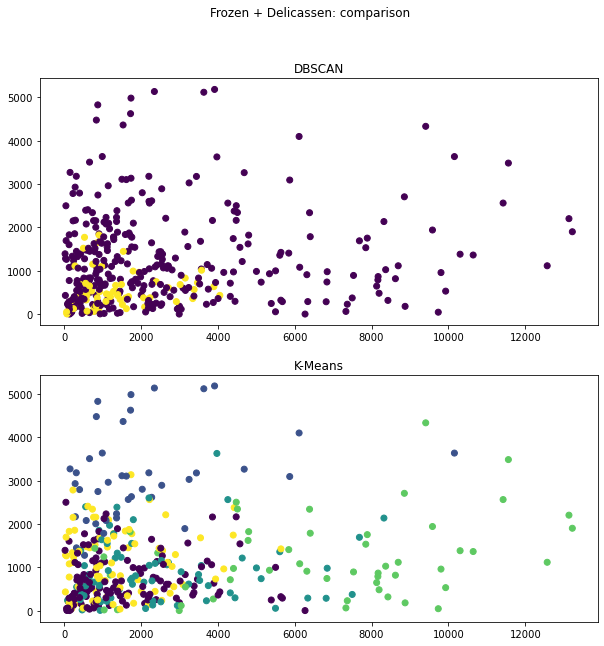

In [24]:
# Your code here:
fig, axs = plt.subplots(2, figsize=(10,10))

fig.suptitle('Frozen + Delicassen: comparison')
axs[0].scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'])
axs[1].scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'])
axs[0].set_title('DBSCAN')
axs[1].set_title('K-Means')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [25]:
# Your code here:

customers.groupby('labels').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen,labels_DBSCAN
labels,,,,,,,,
0,1.021429,2.971429,7656.128571,2474.000000,3156.150000,1528.664286,704.485714,-0.521429
1,1.487805,2.829268,15244.804878,8037.024390,8430.878049,2004.609756,3126.975610,-1.000000
2,1.068493,1.246575,10591.671233,2820.424658,3934.821918,2471.452055,923.643836,-1.000000
3,1.039216,2.843137,22573.254902,3004.705882,3532.333333,6804.686275,1217.627451,-1.000000
4,2.000000,2.633333,5769.222222,8741.200000,14322.177778,1306.044444,1051.277778,-1.000000


In [26]:
customers.groupby('labels_DBSCAN').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen,labels
labels_DBSCAN,,,,,,,,
-1,1.365854,2.45122,11393.780488,5239.204268,7354.902439,2598.442073,1262.740854,2.134146
0,1.000000,3.00000,6020.791045,1541.164179,1962.776119,1327.044776,549.179104,0.000000


Which algorithm appears to perform better?

In [27]:
# Your observations here

model_DBSCAN.


SyntaxError: invalid syntax (<ipython-input-27-909f36daad98>, line 3)

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here